# Problem Statement

Random Forest
 
Assignment


About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows:

 Sales -- Unit sales (in thousands) at each location

 Competitor Price -- Price charged by competitor at each location

 Income -- Community income level (in thousands of dollars)

 Advertising -- Local advertising budget for company at each location (in thousands of dollars)

 Population -- Population size in region (in thousands)

 Price -- Price company charges for car seats at each site

 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site

 Age -- Average age of the local population

 Education -- Education level at each location

 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location

 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:

A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

# Step 1: Importing libraries

In [1]:
import numpy as np

#import lux
import sweetviz
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display

import warnings
warnings.filterwarnings('ignore')


# Step 2: Dataset loading & Data preprocessing

In [2]:
# reading csv file directly from github

file_path = 'https://raw.githubusercontent.com/ShrikantUppin/Ensemble_techniques/main/2_CSV%20files%20%26%20Problem%20Statements/Company_Data.csv'

data = pd.read_csv(file_path, error_bad_lines=False)

In [3]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
x = data.drop('Sales', axis = 1)

In [7]:
x.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,Bad,42,17,Yes,Yes
1,111,48,16,260,83,Good,65,10,Yes,Yes
2,113,35,10,269,80,Medium,59,12,Yes,Yes
3,117,100,4,466,97,Medium,55,14,Yes,Yes
4,141,64,3,340,128,Bad,38,13,Yes,No


In [8]:
y = pd.DataFrame(data = data, columns = ['Sales'])

In [9]:
for i in y.Sales:
    if i>8:
        y['Sales'] = y['Sales'].replace(i, 'yes')
    else:
        y['Sales'] = y['Sales'].replace(i, 'no')

In [10]:
# One hot encoding & label encoding..

x['ShelveLoc'] = x.ShelveLoc.astype('category')
x['ShelveLoc'] = x['ShelveLoc'].cat.codes

y  = pd.get_dummies(y, drop_first=True)

In [11]:
x = pd.get_dummies(x, drop_first=True)

In [12]:
x.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0


In [13]:
y.head()

,Sales_yes
0,1
1,1
2,1
3,0
4,0


# Step 3: Splitting the dataset

In [14]:
def split_data(x,y):
    
    # setting required variables to the global so that they can be accessed outside of function
    global x_train, x_test, y_train, y_test
    
    from sklearn.model_selection import train_test_split

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33,\
                                                        random_state=42, stratify = y)

    #checking target variable data % equal in y_train & y_test
    print('checking tarfet label count balance in y_train & y_test')
    print('-'*40)
    print(y_test.value_counts(normalize=True))
    print('-'*40)
    print(y_train.value_counts(normalize=True))

In [15]:
split_data(x,y)

checking tarfet label count balance in y_train & y_test
----------------------------------------
Sales_yes
0            0.590909
1            0.409091
dtype: float64
----------------------------------------
Sales_yes
0            0.589552
1            0.410448
dtype: float64


# Step 4: Hyperparameter tuning

no. of tress in ranodm forest: 100


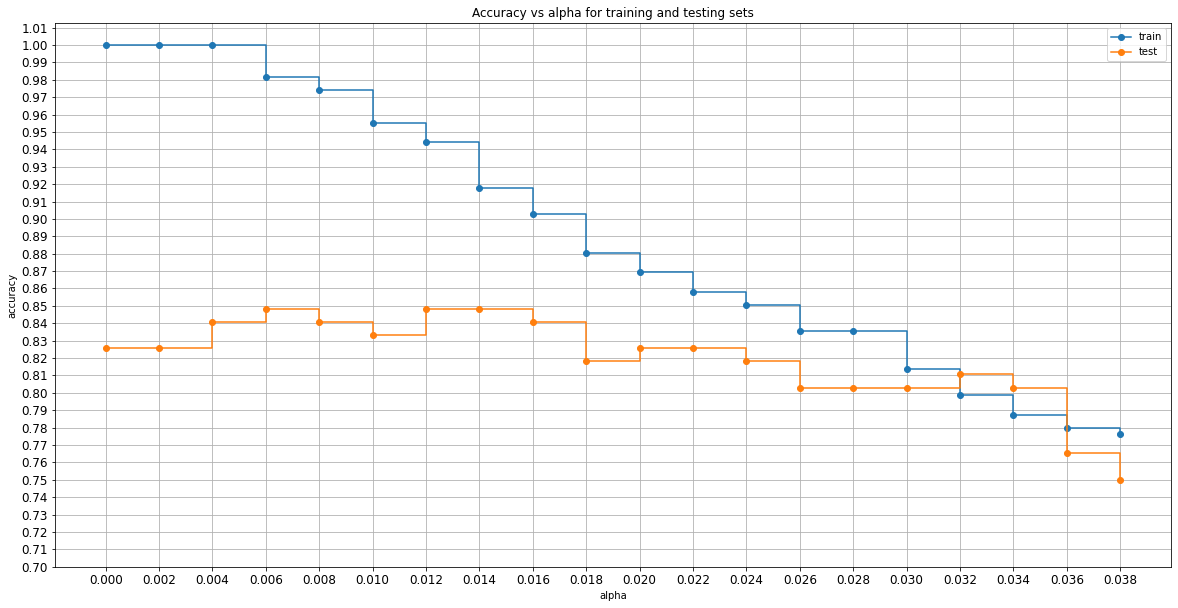

no. of tress in ranodm forest: 200


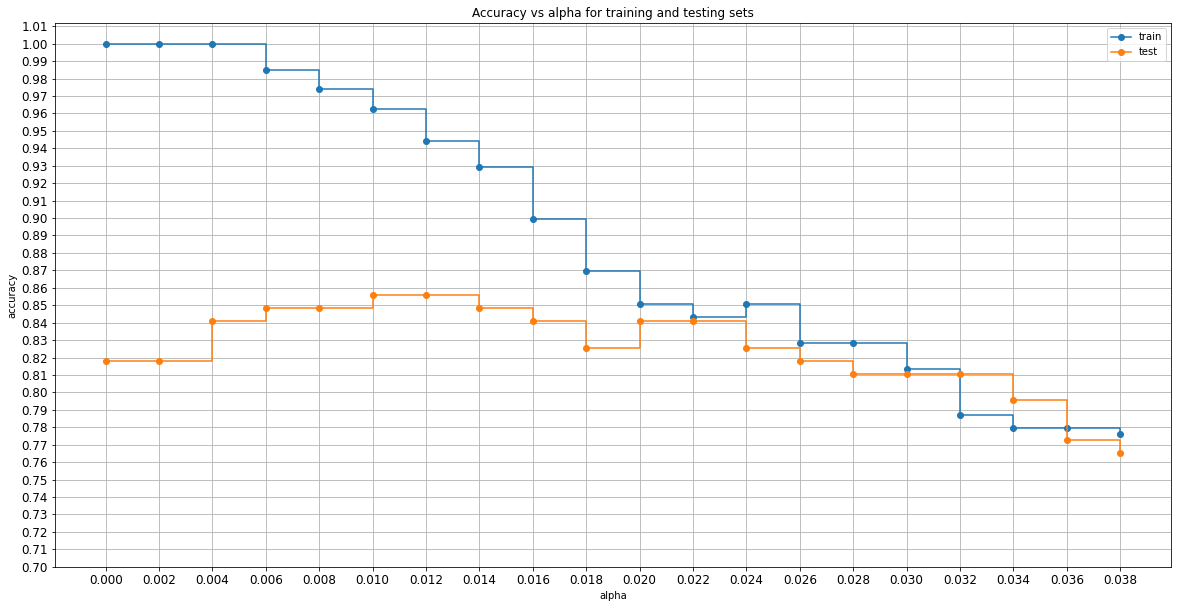

no. of tress in ranodm forest: 300


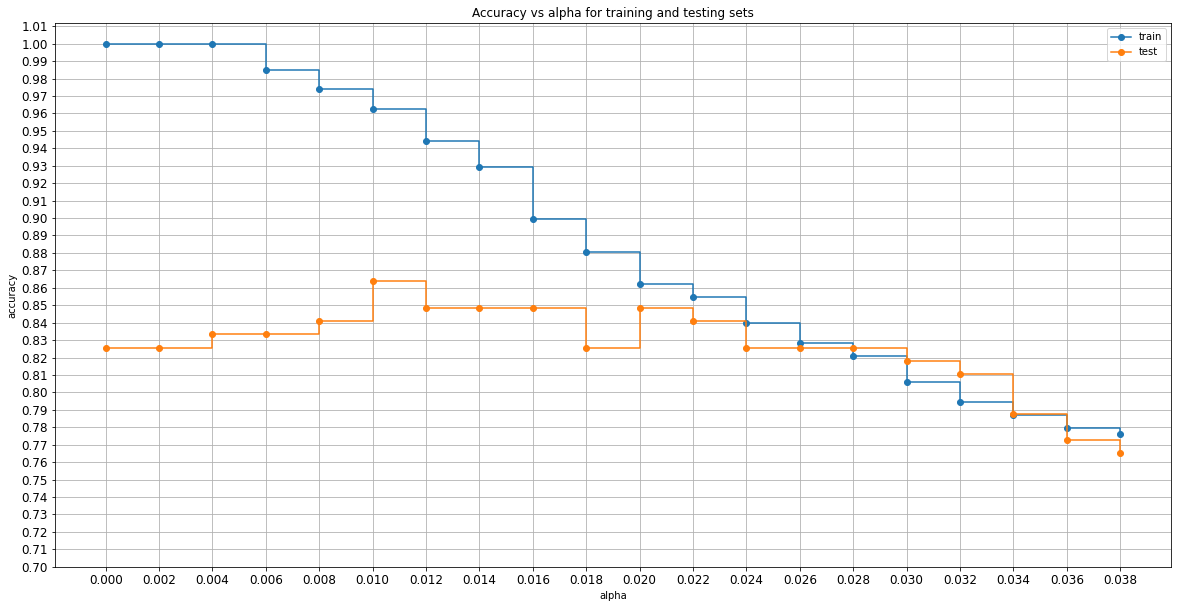

no. of tress in ranodm forest: 400


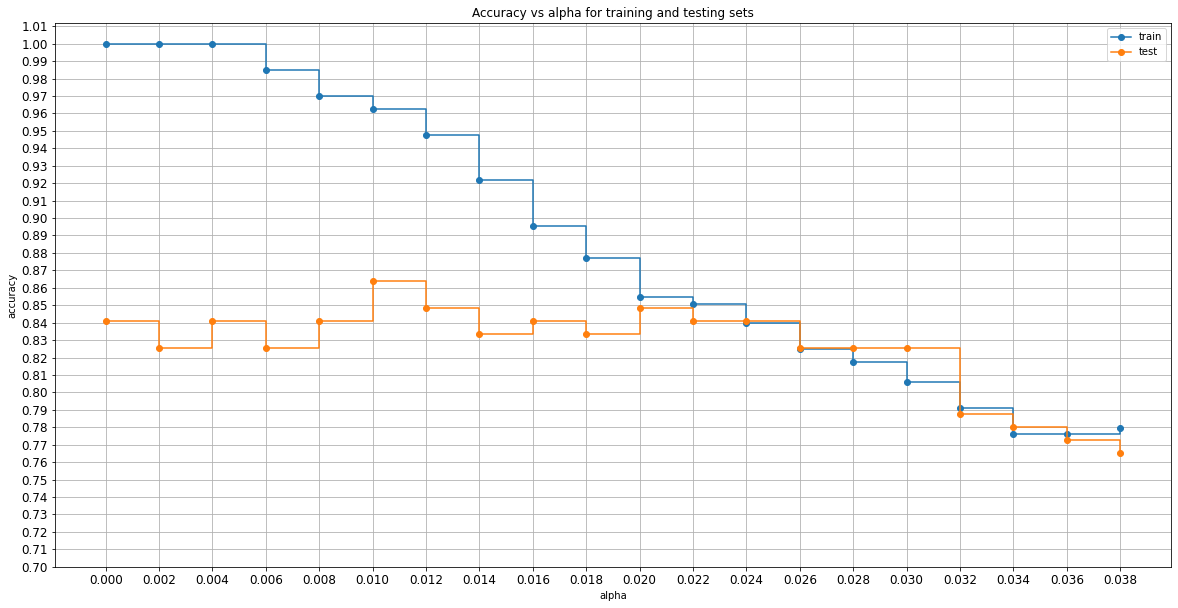

In [22]:
def find_alpha(x_train, x_test, y_train, y_test):
    
    import matplotlib.pyplot as plt
    from sklearn.ensemble import RandomForestClassifier
    
    for i in list(range(100,500,100)):
        print('no. of tress in ranodm forest:',i)
        ccp_alphas = np.arange(0.000, 0.040, 0.002)
        clfs = []
        for ccp_alpha in ccp_alphas:
            clf = RandomForestClassifier(n_estimators=i,random_state=42, ccp_alpha=ccp_alpha)
            clf.fit(x_train, y_train)
            clfs.append(clf)

        train_scores = [clf.score(x_train, y_train) for clf in clfs]
        test_scores = [clf.score(x_test, y_test) for clf in clfs]

        fig, ax = plt.subplots(figsize=(20,10))
        ax.set_xlabel("alpha")
        ax.set_ylabel("accuracy")
        ax.set_title("Accuracy vs alpha for training and testing sets")
        ax.plot(ccp_alphas, train_scores, marker='o', label="train",
                drawstyle="steps-post")
        ax.plot(ccp_alphas, test_scores, marker='o', label="test",
                drawstyle="steps-post")
        ax.set_xticks(np.arange(0.000,0.040, 0.002))
        ax.set_yticks(np.arange(0.70,1.01, 0.01))
        ax.legend()
        plt.grid(True)
        plt.rcParams['xtick.labelsize']=12
        plt.rcParams['ytick.labelsize']=12
        plt.show()

find_alpha(x_train, x_test, y_train, y_test)

ccp_alpha=0.020 gives best accuracy for train & test data.

# Step 5: Model Building...

In [25]:
def model_build(x_train, y_train, x_test, y_test, ccp_alpha_value=0.0, n_estimator=100):
    
    print()
    
    # importing required libraries
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import confusion_matrix, classification_report
    import seaborn as sns
    
    # creating classifier object/instance
    global model
    model = RandomForestClassifier(n_estimators=n_estimator, random_state=42, ccp_alpha = ccp_alpha_value)
    
    # fit model on train datasets
    model.fit(x_train, y_train)
    
    # train & test scores i.e. accuracy
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    
    # model prediction on x_train & x_test dataset
    y_pred_train = model.predict(x_train)
    y_pred_test  = model.predict(x_test)
    
    # confusion matrix
    train_cm = confusion_matrix(y_train, y_pred_train)
    test_cm = confusion_matrix(y_test, y_pred_test)
    
    # classification report
    train_classification = classification_report(y_train, y_train)
    test_classification = classification_report(y_test, y_test)
    
    # TRAIN DATA OUTPUTS..
    print('train_score:', train_score)
    print()
    
    print('CONFUSION MATRIX FOR TRAIN DATA')
    figure1, ax1 = plt.subplots(1,1)
    plt.figure(figsize=(10,8))
    sns.heatmap(train_cm, annot=True, ax = ax1, fmt = 'g')
    plt.show()
    print()
    
    print('Classification report for train data')
    print(train_classification)
    print('-'*60)
    
     # TEST DATA OUTPUTS..
    print('test_score:', test_score)
    print()
    print('CONFUSION MATRIX FOR TEST DATA')
    figure, ax2 = plt.subplots(1,1)
    plt.figure(figsize=(10,8))
    sns.heatmap(test_cm, annot=True, ax = ax2, fmt = 'g')
    plt.show()
    
    print('Classification report for test data')
    print(test_classification)
    print('-'*60)
    
    print('SUMMARY:','train score:',train_score,',', 'test score:', test_score)
    print('model_paramter:', model)


train_score: 0.8432835820895522

CONFUSION MATRIX FOR TRAIN DATA


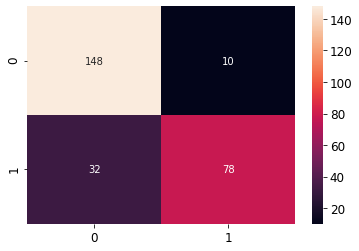

<Figure size 720x576 with 0 Axes>


Classification report for train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       158
           1       1.00      1.00      1.00       110

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268

------------------------------------------------------------
test_score: 0.8409090909090909

CONFUSION MATRIX FOR TEST DATA


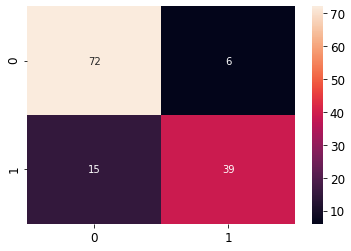

<Figure size 720x576 with 0 Axes>

Classification report for test data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        54

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132

------------------------------------------------------------
SUMMARY: train score: 0.8432835820895522 , test score: 0.8409090909090909
model_paramter: RandomForestClassifier(ccp_alpha=0.022, n_estimators=200, random_state=42)


In [26]:
model_build(x_train, y_train, x_test, y_test, ccp_alpha_value=0.022, n_estimator=200)

# Step 6: Model cross validation.

In [19]:
def model_cross_validation(x, y, cv=5):

    from sklearn import metrics
    from sklearn.model_selection import cross_val_score

    scores = cross_val_score(model, x, y, cv=5)

    print(scores)
    print()
    print('The mean score and the 95% confidence interval of the score estimate:')
    print()
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)) 

In [20]:
model_cross_validation(x, y)

[0.8375 0.7125 0.775  0.7375 0.8   ]

The mean score and the 95% confidence interval of the score estimate:

Accuracy: 0.77 (+/- 0.09)
